In [3]:
import pandas as pd

## Dataframes

In [4]:
df_customers = pd.read_csv('./databases/churn_customers.csv')

In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [6]:
df_services = pd.read_csv('./databases/churn_services.csv')

In [7]:
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   TechSupport       7043 non-null   object
 8   StreamingTV       7043 non-null   object
 9   StreamingMovies   7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB


In [8]:
df_contracts = pd.read_csv('./databases/churn_contracts.csv')

In [9]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


## Transformation
Here, the main goal is change data types, rename columns, create new columns, and others.

TODO
1) The totalCharges was recognized as object, but it's a float column
2) Unified the dataframes to a one unique dataframe

In [10]:
transformedInFloat = pd.to_numeric(df_contracts['TotalCharges'], errors='coerce') # resolve string rows, convert to NULL
df_contracts['TotalCharges'] = transformedInFloat # insert in contracts dataframe

In [11]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


But now, the TotalCharges has -11 rows in comparison with the other's columns

In [12]:
# Merging dataframes with customerID
df_customers_services_contracts = df_customers.merge(df_services, on=["customerID"]).merge(df_contracts, on=["customerID"])

In [13]:
df_customers_services_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Missing values

In [ ]:
# method to identify how many missing values in all columns
df_customers_services_contracts.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
# get all the rows where the value is missing
df_customers_services_contracts[df_customers_services_contracts.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,0,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,0,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,0,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,0,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# removing the rows with missing values
df_customers_services_contracts.dropna(axis=0)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# fill all the missing values
df_withFilledColumns = df_customers_services_contracts.fillna(0) # fill with 0
df_withFilledColumns[df_customers_services_contracts.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,0,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,0,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,0,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,0,Two year,No,Mailed check,73.35,0.0,No


In [ ]:
# fill many columns witha a default values
df_customers_services_contracts.fillna(value={'TotalCharges': 0, 'gender': 'Not Declared'}) # in rows with n/a value in gender column, will be filled with 'not declared', and in totalCharges column, will be filled with 0

In [ ]:
# fill the n/a value with the mean
totalCharges_mean = df_customers_services_contracts.TotalCharges.mean()
df_filledColumnsWithMean = df_customers_services_contracts.fillna(value={'TotalCharges': totalCharges_mean})
df_filledColumnsWithMean.iloc[753] # see one the rows affected

## Analysis
- use the intuition: start with initial ideas based on your domain knowledge
- be specific: create clear and specific hypotheses
- testable: ensure the hypotheses are testable with the available data
- analysis the relations: have some correlation between the variables?
- plot the ideas: use plot to explore and validate the hypotheses
- be open to surprises: the best discoveries come from where you least expect them
- avoid prematured hypotheses: avoid assuming causality without good reason
- refine and update: as you collect information, update your hypotheses

### Hypotheses
1) the age has a strong association with churn
2) a customer with less than 6 months of active contract is more prone to churn
3) a customer with month contracts are more prone to churn

#### Univariate Analysis
Before we start looking at the relation between variables, it is interesting to analyze the variables individually to check their characteristics

In [27]:
# counting the churn rate
df_customers_services_contracts['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
df_customers_services_contracts['Churn'].value_counts(normalize=True) # in percentage

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

[Text(0, 0, '5174'), Text(0, 0, '1869')]

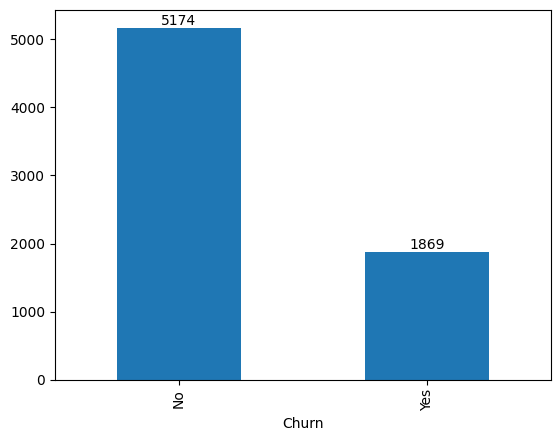

In [ ]:
temp_plot_churn = df_customers_services_contracts["Churn"].value_counts().plot.bar() # plot
temp_plot_churn.bar_label(temp_plot_churn.containers[0]) # plot with a value in top of bar

In [32]:
# how type of contract
df_customers_services_contracts["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

[Text(0, 0, '3875'), Text(0, 0, '1695'), Text(0, 0, '1473')]

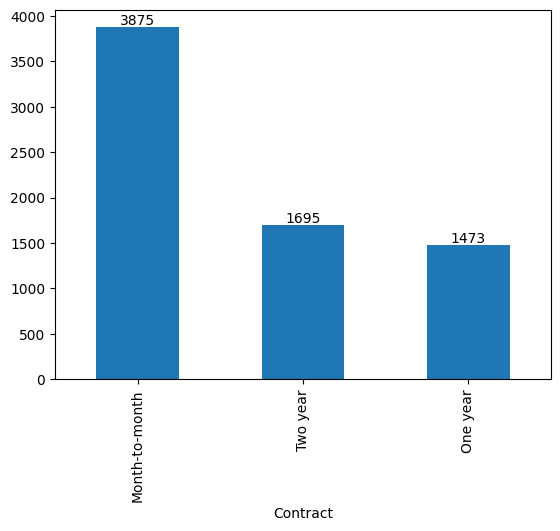

In [33]:
temp_plot_contract = df_customers_services_contracts["Contract"].value_counts().plot.bar() # plot
temp_plot_contract.bar_label(temp_plot_contract.containers[0])

<Axes: ylabel='Frequency'>

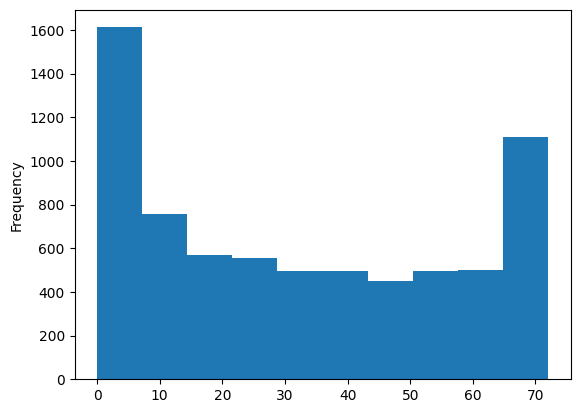

In [34]:
# time contract histogram
df_customers_services_contracts["tenure"].plot.hist()

- tenure does not have a normal distribution, the vast majority of contracts are at the extremes

In [41]:
df_customers_services_contracts["tenure"].mean()

np.float64(32.37114865824223)

In [ ]:
df_customers_services_contracts["tenure"].mode()

0    1
Name: tenure, dtype: int64

In [43]:
df_customers_services_contracts["tenure"].median()

np.float64(29.0)

In [45]:
# how many customers have tenure in 1
customers_with_tenure_in_one= df_customers_services_contracts[(df_customers_services_contracts.tenure == 1)]
len(customers_with_tenure_in_one)

613

In [50]:
# how many customers have tenure between 1 and 6 months
customer_with_tenure_between_1_and_6_months = df_customers_services_contracts[(df_customers_services_contracts.tenure >= 1) & (df_customers_services_contracts.tenure <= 6)]
len(customer_with_tenure_between_1_and_6_months)

1470

In [ ]:
# how man
group_person_by_ternure = df_customers_services_contracts.groupby(['tenure'])
count_the_groups_by_tenure = group_person_by_ternure['tenure'].count()
count_the_groups_by_tenure.sort_values(ascending=False) # sort in descending

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<Axes: ylabel='tenure'>

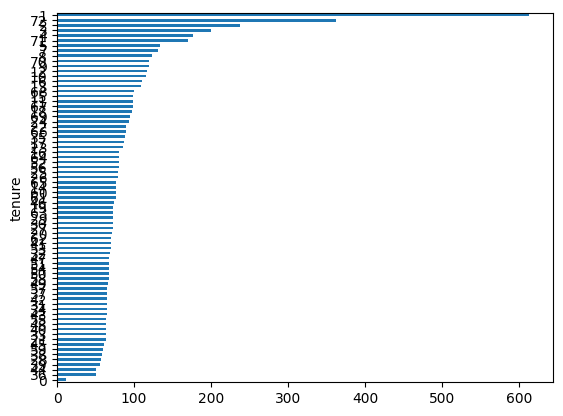

In [ ]:
count_the_groups_by_tenure.sort_values().plot.barh(figsize = (20, 20))